In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# importing data
# finding adopted users 
usr_eng = pd.read_csv("takehome_user_engagement.csv")
users = pd.read_csv("takehome_users.csv", encoding='latin-1')
usr_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


##### As per the problem, "adopted user" is defined as a user who has logged into the product on three separate days in at least one seven-day period. 

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
# First let's convert the "creation_time" and "last_session_creation_time" to datetime.
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


In [7]:
usr_eng['time_stamp'] = pd.to_datetime(usr_eng['time_stamp'])
usr_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
# Now converting the date into week number to find "adopted user"
usr_eng['week'] = usr_eng['time_stamp'].dt.strftime('%Y-%U')
usr_eng.head()

,time_stamp,user_id,visited,week
0,2014-04-22 03:53:30,1,1,2014-16
1,2013-11-15 03:45:04,2,1,2013-45
2,2013-11-29 03:45:04,2,1,2013-47
3,2013-12-09 03:45:04,2,1,2013-49
4,2013-12-25 03:45:04,2,1,2013-51


In [9]:
usr_eng.drop(['time_stamp'], axis=1, inplace=True)
usr_eng.head()

,user_id,visited,week
0,1,1,2014-16
1,2,1,2013-45
2,2,1,2013-47
3,2,1,2013-49
4,2,1,2013-51


In [10]:
adopted_users = usr_eng['visited'].groupby(usr_eng['user_id']).count() > 3
adopted_users.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: visited, dtype: bool

In [11]:
# Since adopted_users is a Series, let's convert it into a dataframe
adopted_df = pd.DataFrame(adopted_users)
adopted_df.head()


,visited
user_id,
1,False
2,True
3,False
4,False
5,False


In [12]:
adopted_df.reset_index(drop=False, inplace=True)
adopted_df.columns = ['user_id', 'adopted_user']
adopted_df.head()

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [13]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id         8823 non-null int64
adopted_user    8823 non-null bool
dtypes: bool(1), int64(1)
memory usage: 77.7 KB


In [14]:
# As we can see out of 12000 users we have only 8823 here because only 8823 have last login time (see above in users.info())
total_users = list(range(1, 12001))
total_users_df = pd.DataFrame(total_users)
total_users_df.head()

,0
0,1
1,2
2,3
3,4
4,5


In [15]:
total_users_df.columns = ['user_id']
total_users_df.head()

,user_id
0,1
1,2
2,3
3,4
4,5


In [16]:
# Let's merge this with adopted_df
adopted_df_new = total_users_df.merge(adopted_df, how='left', on='user_id')
adopted_df_new.fillna(False, inplace=True)
adopted_df_new.head()

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [17]:
adopted_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 2 columns):
user_id         12000 non-null int64
adopted_user    12000 non-null bool
dtypes: bool(1), int64(1)
memory usage: 199.2 KB


In [18]:
# now let's add this to the users dataframe
users['adopted_user'] = adopted_df_new['adopted_user']
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,False


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 949.3+ KB


#### There are few things that could be further assessed:-
1. We can see the email IDs that in the column 'email' are from multiple domains such as yahoo, gmail etc. It would be interesting to find out what is the email domain that the users are using the most. With that we can find the users using which email domain tend to have higher adoption rates.

2. Was the invitee invited by an adopted user? 

3. Was the user invited by organization or as a guest?

In [20]:
# let's separate the domain
users['email_domain'] = users['email'].apply(lambda x: x.split('@')[1].split('.')[0])
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False,yahoo
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,True,gustr
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,False,gustr
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,False,yahoo
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,False,yahoo


In [21]:
users.email_domain.value_counts()

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
              ... 
wjfwv            1
tcftd            1
ppecw            1
eokfv            1
iggnw            1
Name: email_domain, Length: 1184, dtype: int64

In [22]:
users.email_domain.value_counts().head(20)

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
xybhi            2
luque            2
oqpze            2
mumdc            2
xvnbr            2
rerwl            2
dqwln            2
qgjbc            2
rhmlt            1
vdarj            1
cwecb            1
emwyd            1
nvneg            1
spwpk            1
Name: email_domain, dtype: int64

##### As we can see only six domains have significant number of users and rest have 2 at max. So let's pool them into one category as 'others'

In [23]:
significant = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']

users['email_domain'][~users['email_domain'].isin(significant)] = 'others'
users['email_domain'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
others        1186
gustr         1179
hotmail       1165
Name: email_domain, dtype: int64

Text(0.5, 1.0, 'User email domain vs user adoption status')

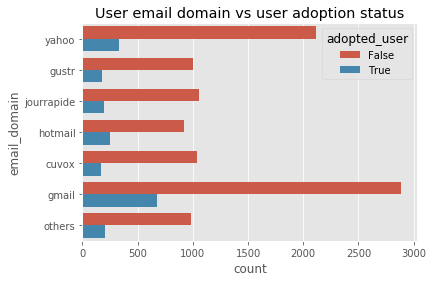

In [24]:
sns.countplot(y='email_domain', hue='adopted_user', data=users)
plt.title('User email domain vs user adoption status')

Text(0.5, 1.0, 'Adopted status by marketing drip')

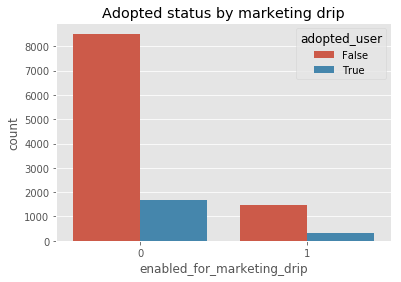

In [25]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=users)
plt.title('Adopted status by marketing drip')

Text(0.5, 1.0, 'Adopted status by creation source')

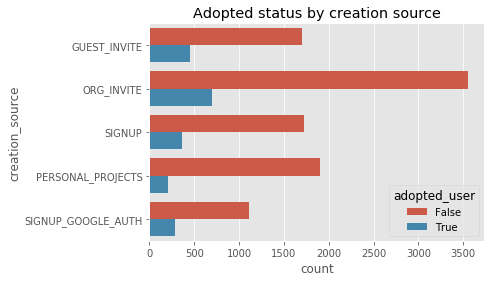

In [26]:
sns.countplot(y='creation_source', hue='adopted_user', data=users)
plt.title('Adopted status by creation source')

Text(0.5, 1.0, 'Adopted status by mailing list opt in')

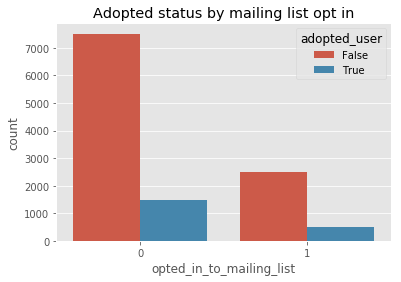

In [27]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=users)
plt.title('Adopted status by mailing list opt in')

In [28]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,False,yahoo
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,True,gustr
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,False,gustr
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,False,yahoo
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,False,yahoo


In [29]:
# Looking into number of users belonging to organization
users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [30]:
users['org_id'].value_counts().head(30)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
11     75
12     75
17     74
18     73
13     72
16     72
20     68
15     64
24     63
25     62
28     61
23     60
30     59
22     58
33     57
40     57
21     56
27     55
Name: org_id, dtype: int64

In [31]:
users['org_id'].value_counts().tail(30)

399    13
410    13
322    12
387    12
346    12
407    12
295    12
354    12
344    12
405    12
381    12
356    12
301    12
232    12
364    11
183    11
365    11
352    10
353    10
294    10
378    10
304    10
395     9
315     9
355     9
396     9
400     8
397     8
386     7
416     2
Name: org_id, dtype: int64

In [32]:
# Let's classify organization into big and small 
# here org 8 has 97 users and next one is 87 so I'm bundling it into big
big_organization = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
users.org_id[users.org_id.isin(big_organization)] = 'big'
users.org_id[users.org_id != 'big'] = 'small'
users.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,small,10803.0,False,yahoo
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,big,316.0,True,gustr
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,small,1525.0,False,gustr
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,big,5151.0,False,yahoo
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,small,5240.0,False,yahoo


Text(0.5, 1.0, 'Adopted status by size of organization')

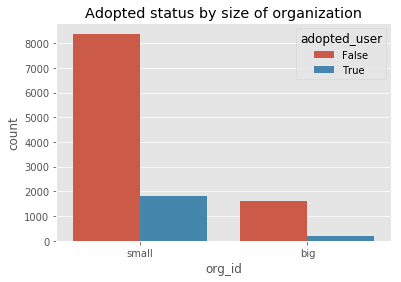

In [33]:
sns.countplot(x='org_id', hue='adopted_user', data=users)
plt.title('Adopted status by size of organization')

## Machine Learning

In [34]:
# Encode the categorical variables
org_id = pd.get_dummies(users.org_id, drop_first=True)
email_domain = pd.get_dummies(users.email_domain, drop_first=True)
creation_source = pd.get_dummies(users.creation_source, drop_first=True)
adopted_user = users.adopted_user.astype(int)
opted_for_mailing_list = users.opted_in_to_mailing_list
enabled_for_marketing_drip = users.enabled_for_marketing_drip

In [35]:
# concatenate the above
df = pd.concat([email_domain, org_id, creation_source, adopted_user, 
                opted_for_mailing_list, enabled_for_marketing_drip], axis=1)

df.head()

,gmail,gustr,hotmail,jourrapide,others,yahoo,small,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip
0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [36]:
df.describe()

,gmail,gustr,hotmail,jourrapide,others,yahoo,small,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.296833,0.098250,0.097083,0.104917,0.098833,0.203917,0.850833,0.354500,0.175917,0.173917,0.115417,0.167250,0.249500,0.149333
std,0.456881,0.297665,0.296084,0.306459,0.298451,0.402925,0.356268,0.478381,0.380765,0.379054,0.319537,0.373214,0.432742,0.356432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Split the data into features and target
X = np.array(df.drop('adopted_user', axis=1))
y = np.array(df.adopted_user)

In [39]:
# Now split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [40]:
rf = RandomForestClassifier(n_estimators = 100, random_state=21, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [41]:
rf_pred = rf.predict(X_test)
# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(rf_pred, y_test))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(y_test, rf_pred))
print('*'*30)
print(classification_report(y_true=y_test, y_pred= rf_pred))

accuracy score:  0.8366666666666667
******************************
Confusion matrix:  [[2008    2]
 [ 390    0]]
******************************
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2010
           1       0.00      0.00      0.00       390

   micro avg       0.84      0.84      0.84      2400
   macro avg       0.42      0.50      0.46      2400
weighted avg       0.70      0.84      0.76      2400



In [42]:
rf.feature_importances_

array([0.05383072, 0.03757749, 0.05699509, 0.03409613, 0.03853216,
       0.04056684, 0.15548868, 0.08692804, 0.14280635, 0.09729195,
       0.02098669, 0.1143504 , 0.12054948])

In [43]:
df_features = pd.get_dummies(df, drop_first=True)
df_features.columns

Index(['gmail', 'gustr', 'hotmail', 'jourrapide', 'others', 'yahoo', 'small',
       'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH',
       'adopted_user', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip'],
      dtype='object')

In [44]:
rf_feature_importance = pd.DataFrame(np.transpose(rf.feature_importances_), index = df.drop('adopted_user', axis=1).columns, columns=['feature_importance']).reset_index()
rf_feature_importance.columns = ['feature_name', 'rf_feature_importance']
rf_feature_importance.set_index('feature_name', inplace=True)
rf_feature_importance.sort_values(by='rf_feature_importance', ascending=False)

,rf_feature_importance
feature_name,
small,0.155489
PERSONAL_PROJECTS,0.142806
enabled_for_marketing_drip,0.120549
opted_in_to_mailing_list,0.114350
SIGNUP,0.097292
ORG_INVITE,0.086928
hotmail,0.056995
gmail,0.053831
yahoo,0.040567


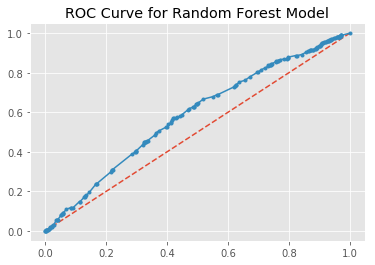

In [45]:
probability = rf.predict_proba(X_test)

# probability for +ve outcomes only
probability = probability[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
auc = roc_auc_score(y_test, probability)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

plt.title('ROC Curve for Random Forest Model')

plt.show()

In [46]:
logreg = LogisticRegression(C=0.01, tol=1e-5,random_state=21)
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=21, solver='warn',
          tol=1e-05, verbose=0, warm_start=False)

In [47]:
logreg_pred = logreg.predict(X_test)
# print the accuracy and confusion matrix
print('accuracy score: ', accuracy_score(logreg_pred, y_test))
print('*'*30)
print('Confusion matrix: ', confusion_matrix(y_test, logreg_pred))
print('*'*30)
print(classification_report(y_true=y_test, y_pred= logreg_pred))

accuracy score:  0.8375
******************************
Confusion matrix:  [[2010    0]
 [ 390    0]]
******************************
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2010
           1       0.00      0.00      0.00       390

   micro avg       0.84      0.84      0.84      2400
   macro avg       0.42      0.50      0.46      2400
weighted avg       0.70      0.84      0.76      2400



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
logreg_feature_importance = pd.DataFrame(np.transpose(logreg.coef_), index = df.drop('adopted_user', axis=1).columns, columns=['feature_importance']).reset_index()
logreg_feature_importance.columns = ['feature_name', 'logreg_feature_importance']
logreg_feature_importance.set_index('feature_name', inplace=True)
logreg_feature_importance.sort_values(by='logreg_feature_importance', ascending=False)

,logreg_feature_importance
feature_name,
hotmail,0.063338
small,0.003250
enabled_for_marketing_drip,0.001855
opted_in_to_mailing_list,-0.045109
gmail,-0.046663
others,-0.073902
SIGNUP_GOOGLE_AUTH,-0.080508
jourrapide,-0.145113
gustr,-0.166588


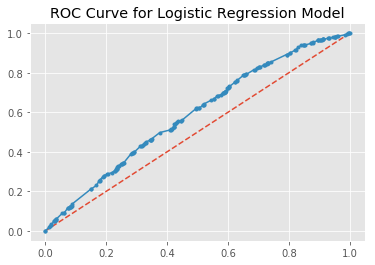

In [49]:
probability = logreg.predict_proba(X_test)

# probability for +ve outcomes only
probability = probability[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probability)
auc = roc_auc_score(y_test, probability)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

plt.title('ROC Curve for Logistic Regression Model')

plt.show()

Both models above performed fairly well based on the accuracy score. Based on the results it seems that users who were from small organizations, enabled for marketing drip, opting for  mailing list seem to be important factors in predicting future user adoption.